# HiveMind: Internship Tasks

## Preparing Environment

In [1]:
!pip install kaggle

In [2]:
!mkdir .kaggle
import json

token = {"username":"","key":""}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘.kaggle’: File exists


# World Happiness

## Downloading Data

In [3]:
!kaggle datasets download -d unsdsn/world-happiness

world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


## Reading in data for 2015, 2016 and 2017

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
world_happiness_2015 = pd.read_csv('2015.csv')
world_happiness_2016 = pd.read_csv('2016.csv')
world_happiness_2017 = pd.read_csv('2017.csv')

## Task 1: Countries with a happiness score of less than 5.0

### 2015

In [7]:
world_happiness_2015[world_happiness_2015['Happiness Score'] < 5.0][['Country']].head(5)

,Country
93,Mozambique
94,Albania
95,Bosnia and Herzegovina
96,Lesotho
97,Dominican Republic


### 2016

In [8]:
world_happiness_2016[world_happiness_2016['Happiness Score'] < 5.0][['Country']].head(5)

,Country
99,Tajikistan
100,Mongolia
101,Laos
102,Nigeria
103,Honduras


### 2017

In [9]:
world_happiness_2017[world_happiness_2017['Happiness.Score'] < 5.0][['Country']].head(5)

,Country
98,Nepal
99,Mongolia
100,South Africa
101,Tunisia
102,Palestinian Territories


## Task 2: Which is the unhappiest country in Sub-Saharan Africa?

### 2015

In [10]:
world_happiness_2015[world_happiness_2015['Region'].str.contains('Sub-Saharan Africa')]\
.sort_values(by = 'Happiness Score', ascending = True).head(1)[['Country']]

,Country
157,Togo


### 2016

In [11]:
world_happiness_2016[world_happiness_2016['Region'].str.contains('Sub-Saharan Africa')]\
.sort_values(by = 'Happiness Score', ascending = True).head(1)[['Country']]

,Country
156,Burundi


### 2017

Since the 2017 data doesn't contain Regions, we need to merge it with either the 2015 or 2016 dataset.

In [12]:
# merging with 2015 data and checking for missing values
pd.merge(world_happiness_2015[['Country','Region']], world_happiness_2017, 
         on = 'Country', how = 'right').Region.isna().sum()

6

In [13]:
# merging with 2016 data and checking for missing values
pd.merge(world_happiness_2016[['Country','Region']], world_happiness_2017, 
         on = 'Country', how = 'right').Region.isna().sum()

5

Since 2016 contains fewer missing values, we'll merge it with the 2016 dataset

In [0]:
world_happiness_2017_with_regions = pd.merge(world_happiness_2016[['Country','Region']], 
                                            world_happiness_2017, on = 'Country', how = 'right')

In [15]:
world_happiness_2017_with_regions[world_happiness_2017_with_regions.Region.isna()]

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Taiwan Province of China,NaN,33,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607
151,"Hong Kong S.A.R., China",NaN,71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633
152,Mozambique,NaN,113,4.550,4.774102,4.325898,0.234306,0.870701,0.106654,0.480791,0.322228,0.179436,2.355651
153,Lesotho,NaN,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
154,Central African Republic,NaN,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


Since we know that 'Mozambique', 'Lesotho' and 'Central African Republic' are in Sub-Saharan Africa ([List of sub-saharan countries](https://www.loc.gov/rr/amed/guide/afr-countrylist.html)), we will change the `Region`.

In [0]:
world_happiness_2017_with_regions\
.loc[world_happiness_2017_with_regions.Country\
     .isin(['Mozambique','Lesotho','Central African Republic']), 'Region'] = 'Sub-Saharan Africa'

In [17]:
world_happiness_2017_with_regions.dropna()[world_happiness_2017_with_regions.dropna()['Region']\
                                 .str.contains('Sub-Saharan Africa')]\
                                 .sort_values(by = 'Happiness.Score', ascending = True).head(1)[['Country']]

,Country
154,Central African Republic


## Task 3: Compare the Unhappiest and happiest countries in each region

### 2015

In [18]:
idx = world_happiness_2015.groupby(['Region'])['Happiness Score']\
.transform(max) == world_happiness_2015['Happiness Score']
happiest_2015 = world_happiness_2015[idx][['Country','Region','Happiness Score']]
happiest_2015 = happiest_2015.rename(columns = {'Country': 'Happiest_Country','Happiness Score':'Happiness_Score_Happiest'})
happiest_2015

,Happiest_Country,Region,Happiness_Score_Happiest
0,Switzerland,Western Europe,7.587
4,Canada,North America,7.427
8,New Zealand,Australia and New Zealand,7.286
10,Israel,Middle East and Northern Africa,7.278
11,Costa Rica,Latin America and Caribbean,7.226
23,Singapore,Southeastern Asia,6.798
30,Czech Republic,Central and Eastern Europe,6.505
37,Taiwan,Eastern Asia,6.298
70,Mauritius,Sub-Saharan Africa,5.477
78,Bhutan,Southern Asia,5.253


In [19]:
idx = world_happiness_2015.groupby(['Region'])['Happiness Score']\
.transform(min) == world_happiness_2015['Happiness Score']
unhappiest_2015 = world_happiness_2015[idx][['Country','Region','Happiness Score']]
unhappiest_2015 = unhappiest_2015.rename(columns = {'Country': 'Unhappiest_Country','Happiness Score':'Happiness_Score_Unhappiest'})
unhappiest_2015

,Unhappiest_Country,Region,Happiness_Score_Unhappiest
9,Australia,Australia and New Zealand,7.284
14,United States,North America,7.119
99,Mongolia,Eastern Asia,4.874
101,Greece,Western Europe,4.857
118,Haiti,Latin America and Caribbean,4.518
133,Bulgaria,Central and Eastern Europe,4.218
144,Cambodia,Southeastern Asia,3.819
152,Afghanistan,Southern Asia,3.575
155,Syria,Middle East and Northern Africa,3.006
157,Togo,Sub-Saharan Africa,2.839


In [20]:
happiest_unhappiest_2015 = pd.merge(unhappiest_2015, happiest_2015, on = 'Region', how = 'outer')
happiest_unhappiest_2015

,Unhappiest_Country,Region,Happiness_Score_Unhappiest,Happiest_Country,Happiness_Score_Happiest
0,Australia,Australia and New Zealand,7.284,New Zealand,7.286
1,United States,North America,7.119,Canada,7.427
2,Mongolia,Eastern Asia,4.874,Taiwan,6.298
3,Greece,Western Europe,4.857,Switzerland,7.587
4,Haiti,Latin America and Caribbean,4.518,Costa Rica,7.226
5,Bulgaria,Central and Eastern Europe,4.218,Czech Republic,6.505
6,Cambodia,Southeastern Asia,3.819,Singapore,6.798
7,Afghanistan,Southern Asia,3.575,Bhutan,5.253
8,Syria,Middle East and Northern Africa,3.006,Israel,7.278
9,Togo,Sub-Saharan Africa,2.839,Mauritius,5.477


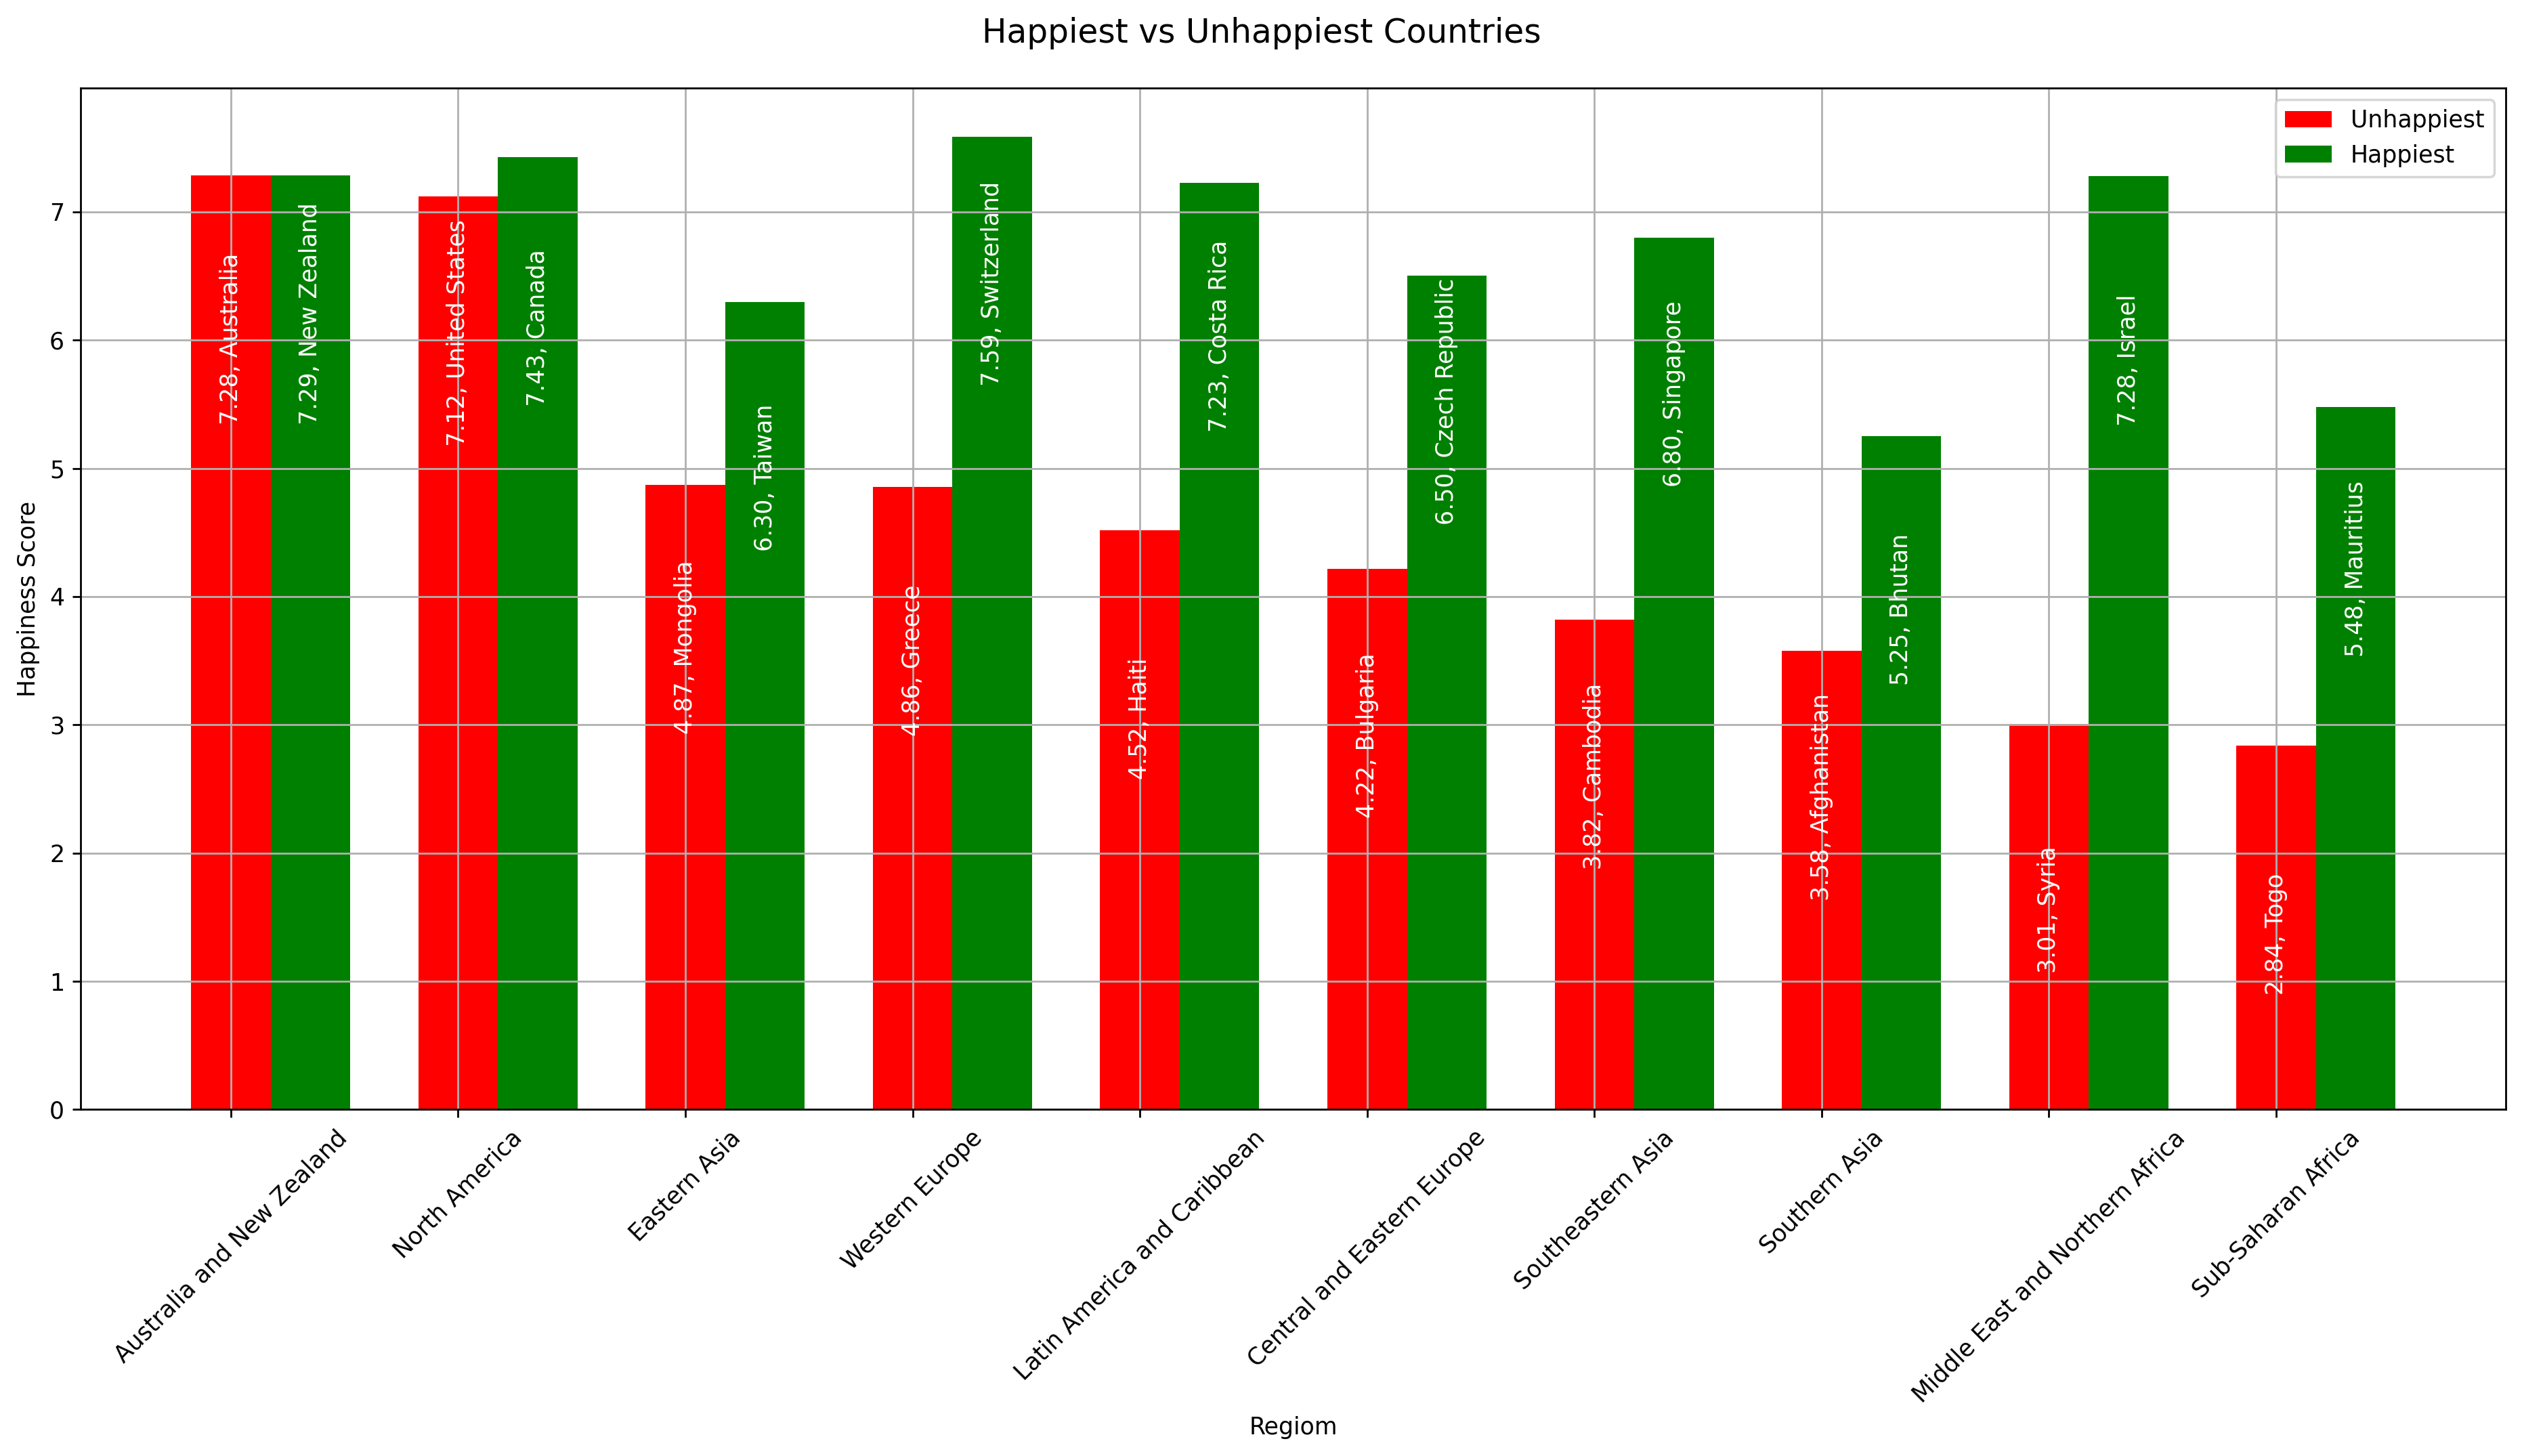

In [21]:
plt.figure(figsize=(15, 9), dpi= 250)

width = 0.35
ind = np.arange(happiest_unhappiest_2015.shape[0])

unhappy_plot = plt.bar(ind, happiest_unhappiest_2015['Happiness_Score_Unhappiest'], width = width, color = 'red')
happy_plot = plt.bar(ind + width, happiest_unhappiest_2015['Happiness_Score_Happiest'], width = width, color = 'green')

plt.xlabel('Regiom')
plt.ylabel('Happiness Score')
plt.grid()
plt.xticks(ind, happiest_unhappiest_2015['Region'])
plt.xticks(rotation=45) 
plt.legend(['Unhappiest','Happiest'], loc='upper right')
plt.suptitle('Happiest vs Unhappiest Countries',fontsize=14)

def autolabel(rects, countries):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, country in zip(rects, countries):
        height = rect.get_height()
        plt.annotate('{0:.2f}, {1}'.format(height, country),
                    xy=(rect.get_x() + rect.get_width() / 2, height - 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90,
                    color = 'white')
        
autolabel(unhappy_plot, happiest_unhappiest_2015['Unhappiest_Country'])
autolabel(happy_plot, happiest_unhappiest_2015['Happiest_Country'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2016

In [22]:
idx = world_happiness_2016.groupby(['Region'])['Happiness Score']\
.transform(max) == world_happiness_2016['Happiness Score']
happiest_2016 = world_happiness_2016[idx][['Country','Region','Happiness Score']]
happiest_2016 = happiest_2016.rename(columns = {'Country': 'Happiest_Country','Happiness Score':'Happiness_Score_Happiest'})
happiest_2016

,Happiest_Country,Region,Happiness_Score_Happiest
0,Denmark,Western Europe,7.526
5,Canada,North America,7.404
7,New Zealand,Australia and New Zealand,7.334
10,Israel,Middle East and Northern Africa,7.267
13,Costa Rica,Latin America and Caribbean,7.087
21,Singapore,Southeastern Asia,6.739
26,Czech Republic,Central and Eastern Europe,6.596
34,Taiwan,Eastern Asia,6.379
65,Mauritius,Sub-Saharan Africa,5.648
83,Bhutan,Southern Asia,5.196


In [23]:
idx = world_happiness_2016.groupby(['Region'])['Happiness Score']\
.transform(min) == world_happiness_2016['Happiness Score']
unhappiest_2016 = world_happiness_2016[idx][['Country','Region','Happiness Score']]
unhappiest_2016 = unhappiest_2016.rename(columns = {'Country': 'Unhappiest_Country','Happiness Score':'Happiness_Score_Unhappiest'})
unhappiest_2016

,Unhappiest_Country,Region,Happiness_Score_Unhappiest
8,Australia,Australia and New Zealand,7.313
12,United States,North America,7.104
98,Greece,Western Europe,5.033
100,Mongolia,Eastern Asia,4.907
128,Bulgaria,Central and Eastern Europe,4.217
135,Haiti,Latin America and Caribbean,4.028
139,Cambodia,Southeastern Asia,3.907
153,Afghanistan,Southern Asia,3.360
155,Syria,Middle East and Northern Africa,3.069
156,Burundi,Sub-Saharan Africa,2.905


In [24]:
happiest_unhappiest_2016 = pd.merge(unhappiest_2016, happiest_2016, on = 'Region', how = 'outer')
happiest_unhappiest_2016

,Unhappiest_Country,Region,Happiness_Score_Unhappiest,Happiest_Country,Happiness_Score_Happiest
0,Australia,Australia and New Zealand,7.313,New Zealand,7.334
1,United States,North America,7.104,Canada,7.404
2,Greece,Western Europe,5.033,Denmark,7.526
3,Mongolia,Eastern Asia,4.907,Taiwan,6.379
4,Bulgaria,Central and Eastern Europe,4.217,Czech Republic,6.596
5,Haiti,Latin America and Caribbean,4.028,Costa Rica,7.087
6,Cambodia,Southeastern Asia,3.907,Singapore,6.739
7,Afghanistan,Southern Asia,3.360,Bhutan,5.196
8,Syria,Middle East and Northern Africa,3.069,Israel,7.267
9,Burundi,Sub-Saharan Africa,2.905,Mauritius,5.648


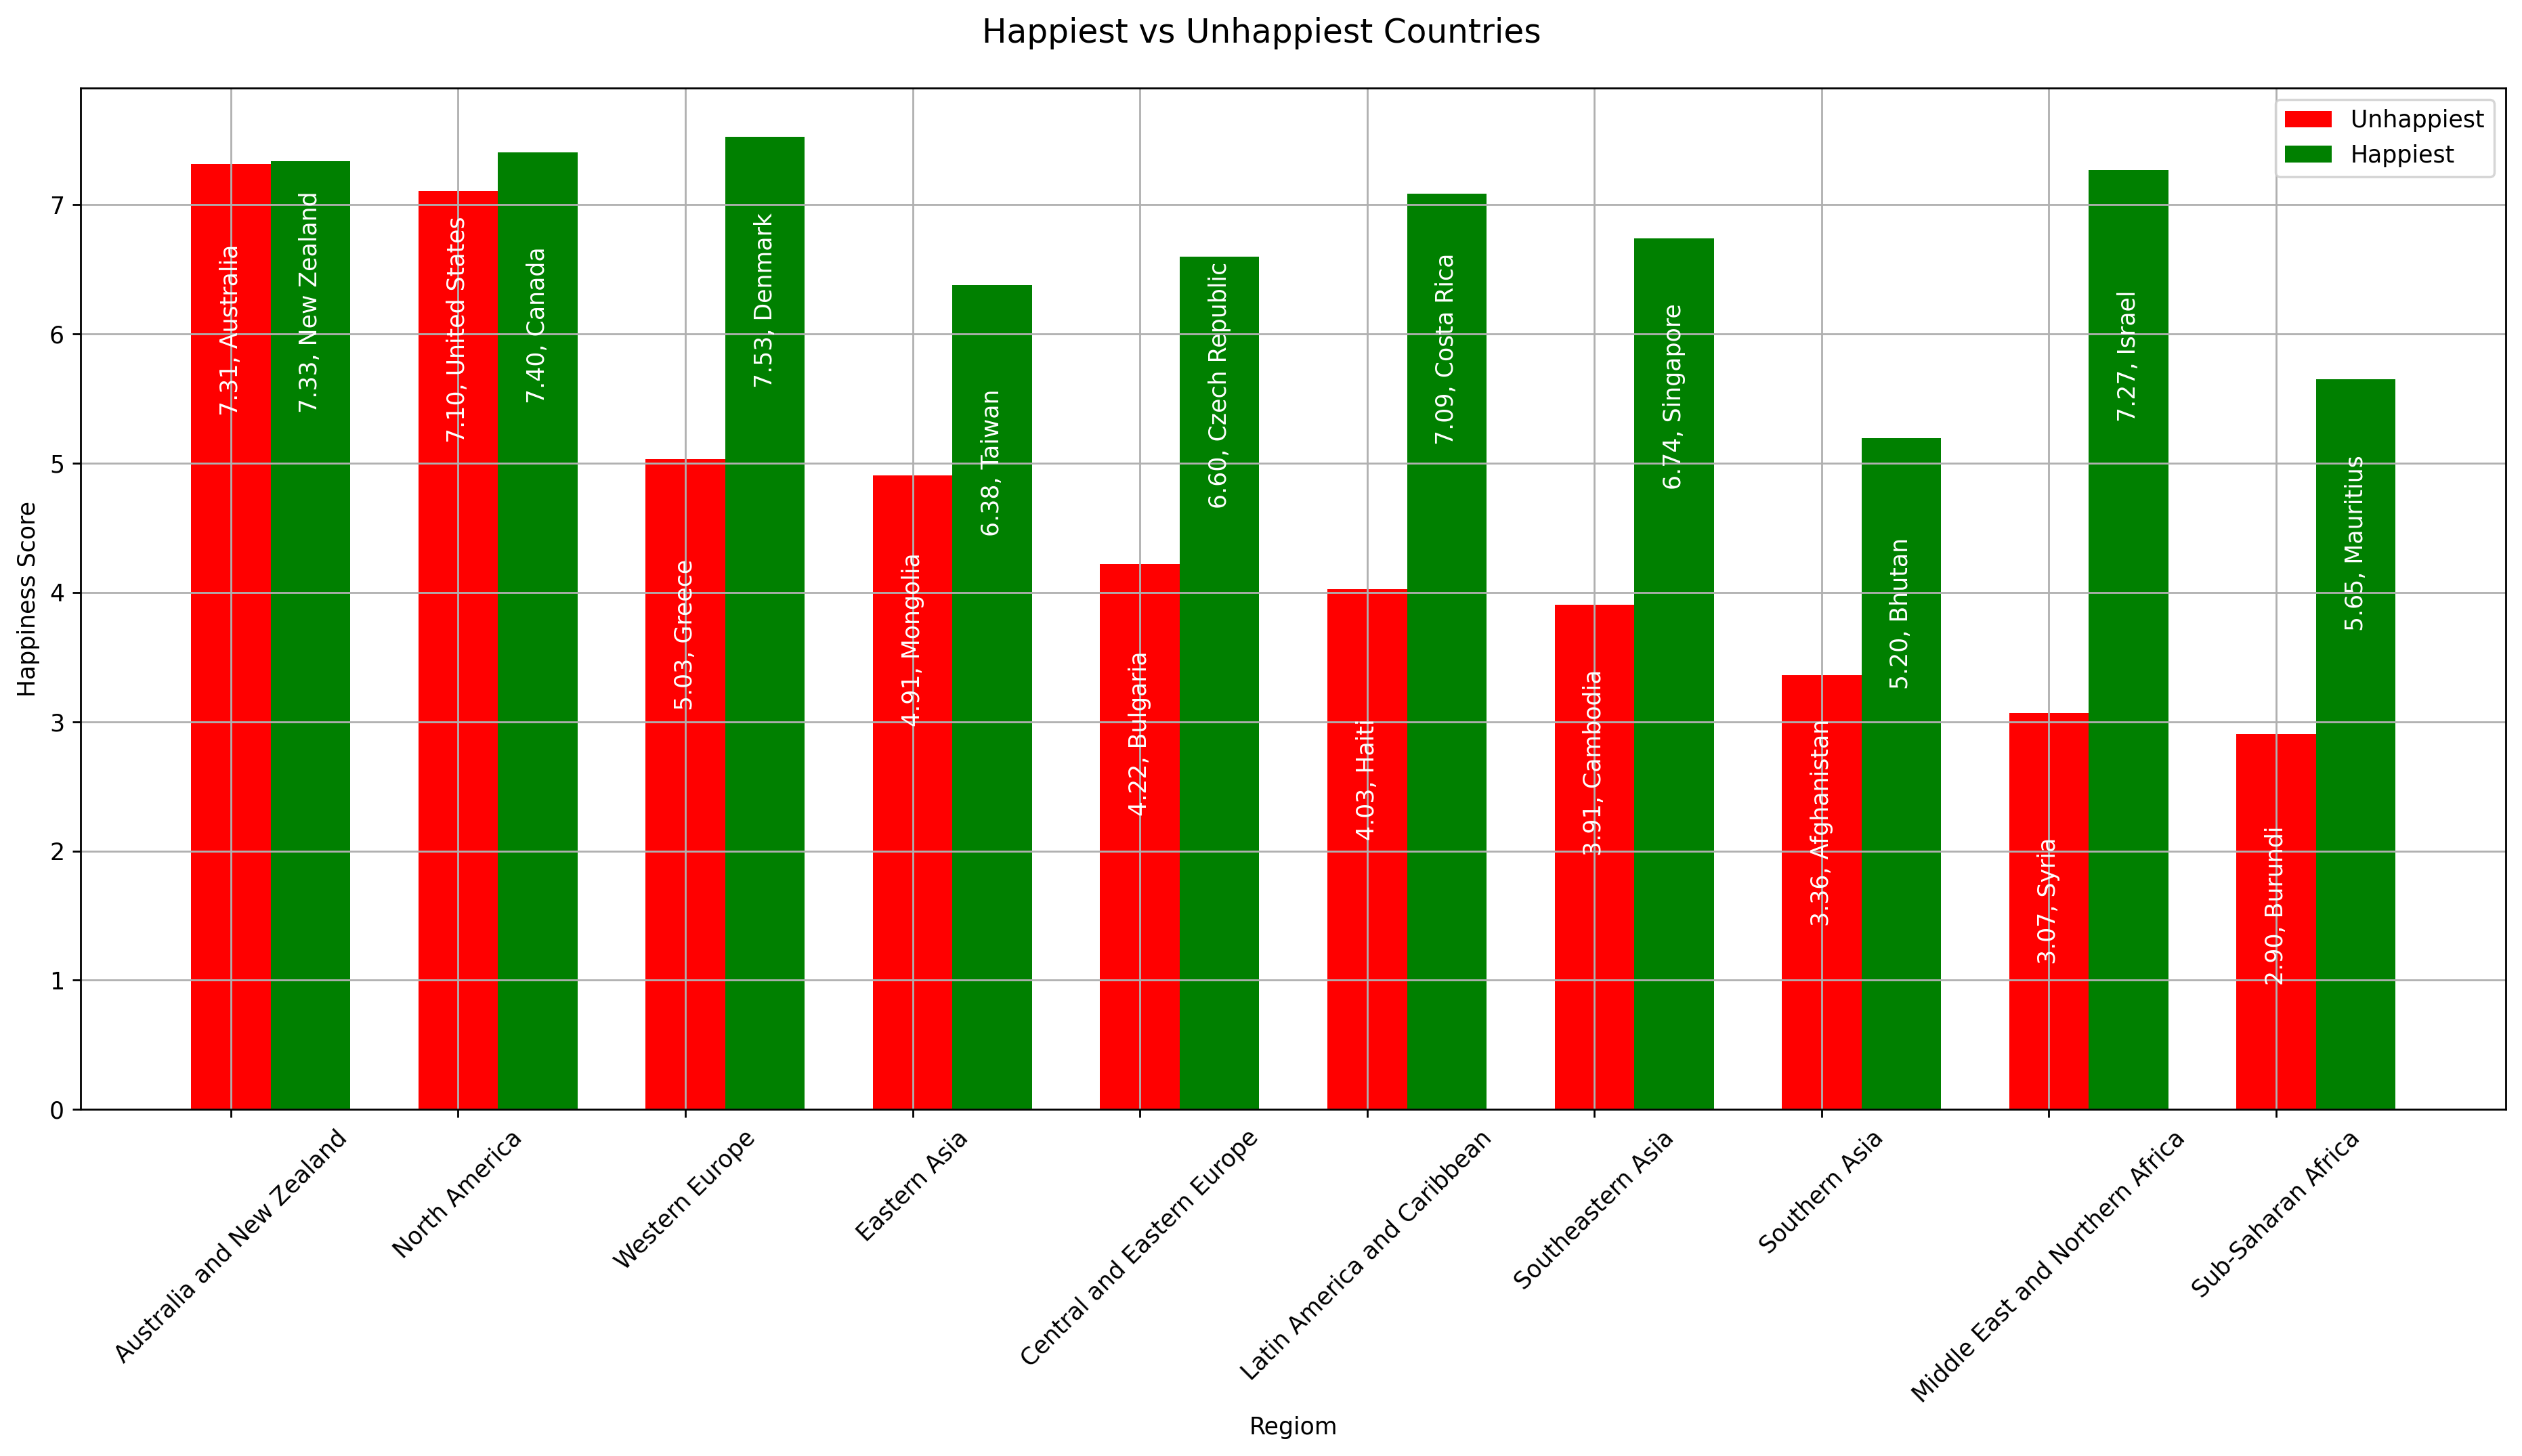

In [25]:
plt.figure(figsize=(15, 9), dpi= 250)

width = 0.35
ind = np.arange(happiest_unhappiest_2016.shape[0])

unhappy_plot = plt.bar(ind, happiest_unhappiest_2016['Happiness_Score_Unhappiest'], width = width, color = 'red')
happy_plot = plt.bar(ind + width, happiest_unhappiest_2016['Happiness_Score_Happiest'], width = width, color = 'green')

plt.xlabel('Regiom')
plt.ylabel('Happiness Score')
plt.grid()
plt.xticks(ind, happiest_unhappiest_2016['Region'])
plt.xticks(rotation=45) 
plt.legend(['Unhappiest','Happiest'], loc='upper right')
plt.suptitle('Happiest vs Unhappiest Countries',fontsize=14)

def autolabel(rects, countries):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, country in zip(rects, countries):
        height = rect.get_height()
        plt.annotate('{0:.2f}, {1}'.format(height, country),
                    xy=(rect.get_x() + rect.get_width() / 2, height - 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90,
                    color = 'white')
        
autolabel(unhappy_plot, happiest_unhappiest_2016['Unhappiest_Country'])
autolabel(happy_plot, happiest_unhappiest_2016['Happiest_Country'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2017

In [26]:
idx = world_happiness_2017_with_regions.groupby(['Region'])['Happiness.Score']\
.transform(max) == world_happiness_2017_with_regions['Happiness.Score']
happiest_2017 = world_happiness_2017_with_regions[idx][['Country','Region','Happiness.Score']]
happiest_2017 = happiest_2017.rename(columns = {'Country': 'Happiest_Country','Happiness.Score':'Happiness_Score_Happiest'})
happiest_2017

,Happiest_Country,Region,Happiness_Score_Happiest
3,Norway,Western Europe,7.537
5,Canada,North America,7.316
7,New Zealand,Australia and New Zealand,7.314
10,Israel,Middle East and Northern Africa,7.213
13,Costa Rica,Latin America and Caribbean,7.079
20,Singapore,Southeastern Asia,6.572
25,Czech Republic,Central and Eastern Europe,6.609
49,Japan,Eastern Asia,5.920
62,Mauritius,Sub-Saharan Africa,5.629
87,Pakistan,Southern Asia,5.269


In [27]:
idx = world_happiness_2017_with_regions.groupby(['Region'])['Happiness.Score']\
.transform(min) == world_happiness_2017_with_regions['Happiness.Score']
unhappiest_2017 = world_happiness_2017_with_regions[idx][['Country','Region','Happiness.Score']]
unhappiest_2017 = unhappiest_2017.rename(columns = {'Country': 'Unhappiest_Country','Happiness.Score':'Happiness_Score_Unhappiest'})
unhappiest_2017

,Unhappiest_Country,Region,Happiness_Score_Unhappiest
8,Australia,Australia and New Zealand,7.284
12,United States,North America,6.993
89,Portugal,Western Europe,5.195
95,Mongolia,Eastern Asia,4.955
116,Ukraine,Central and Eastern Europe,4.096
129,Haiti,Latin America and Caribbean,3.603
132,Cambodia,Southeastern Asia,4.168
146,Afghanistan,Southern Asia,3.794
148,Syria,Middle East and Northern Africa,3.462
154,Central African Republic,Sub-Saharan Africa,2.693


In [28]:
happiest_unhappiest_2017 = pd.merge(unhappiest_2017, happiest_2017, on = 'Region', how = 'outer')
happiest_unhappiest_2017

,Unhappiest_Country,Region,Happiness_Score_Unhappiest,Happiest_Country,Happiness_Score_Happiest
0,Australia,Australia and New Zealand,7.284,New Zealand,7.314
1,United States,North America,6.993,Canada,7.316
2,Portugal,Western Europe,5.195,Norway,7.537
3,Mongolia,Eastern Asia,4.955,Japan,5.920
4,Ukraine,Central and Eastern Europe,4.096,Czech Republic,6.609
5,Haiti,Latin America and Caribbean,3.603,Costa Rica,7.079
6,Cambodia,Southeastern Asia,4.168,Singapore,6.572
7,Afghanistan,Southern Asia,3.794,Pakistan,5.269
8,Syria,Middle East and Northern Africa,3.462,Israel,7.213
9,Central African Republic,Sub-Saharan Africa,2.693,Mauritius,5.629


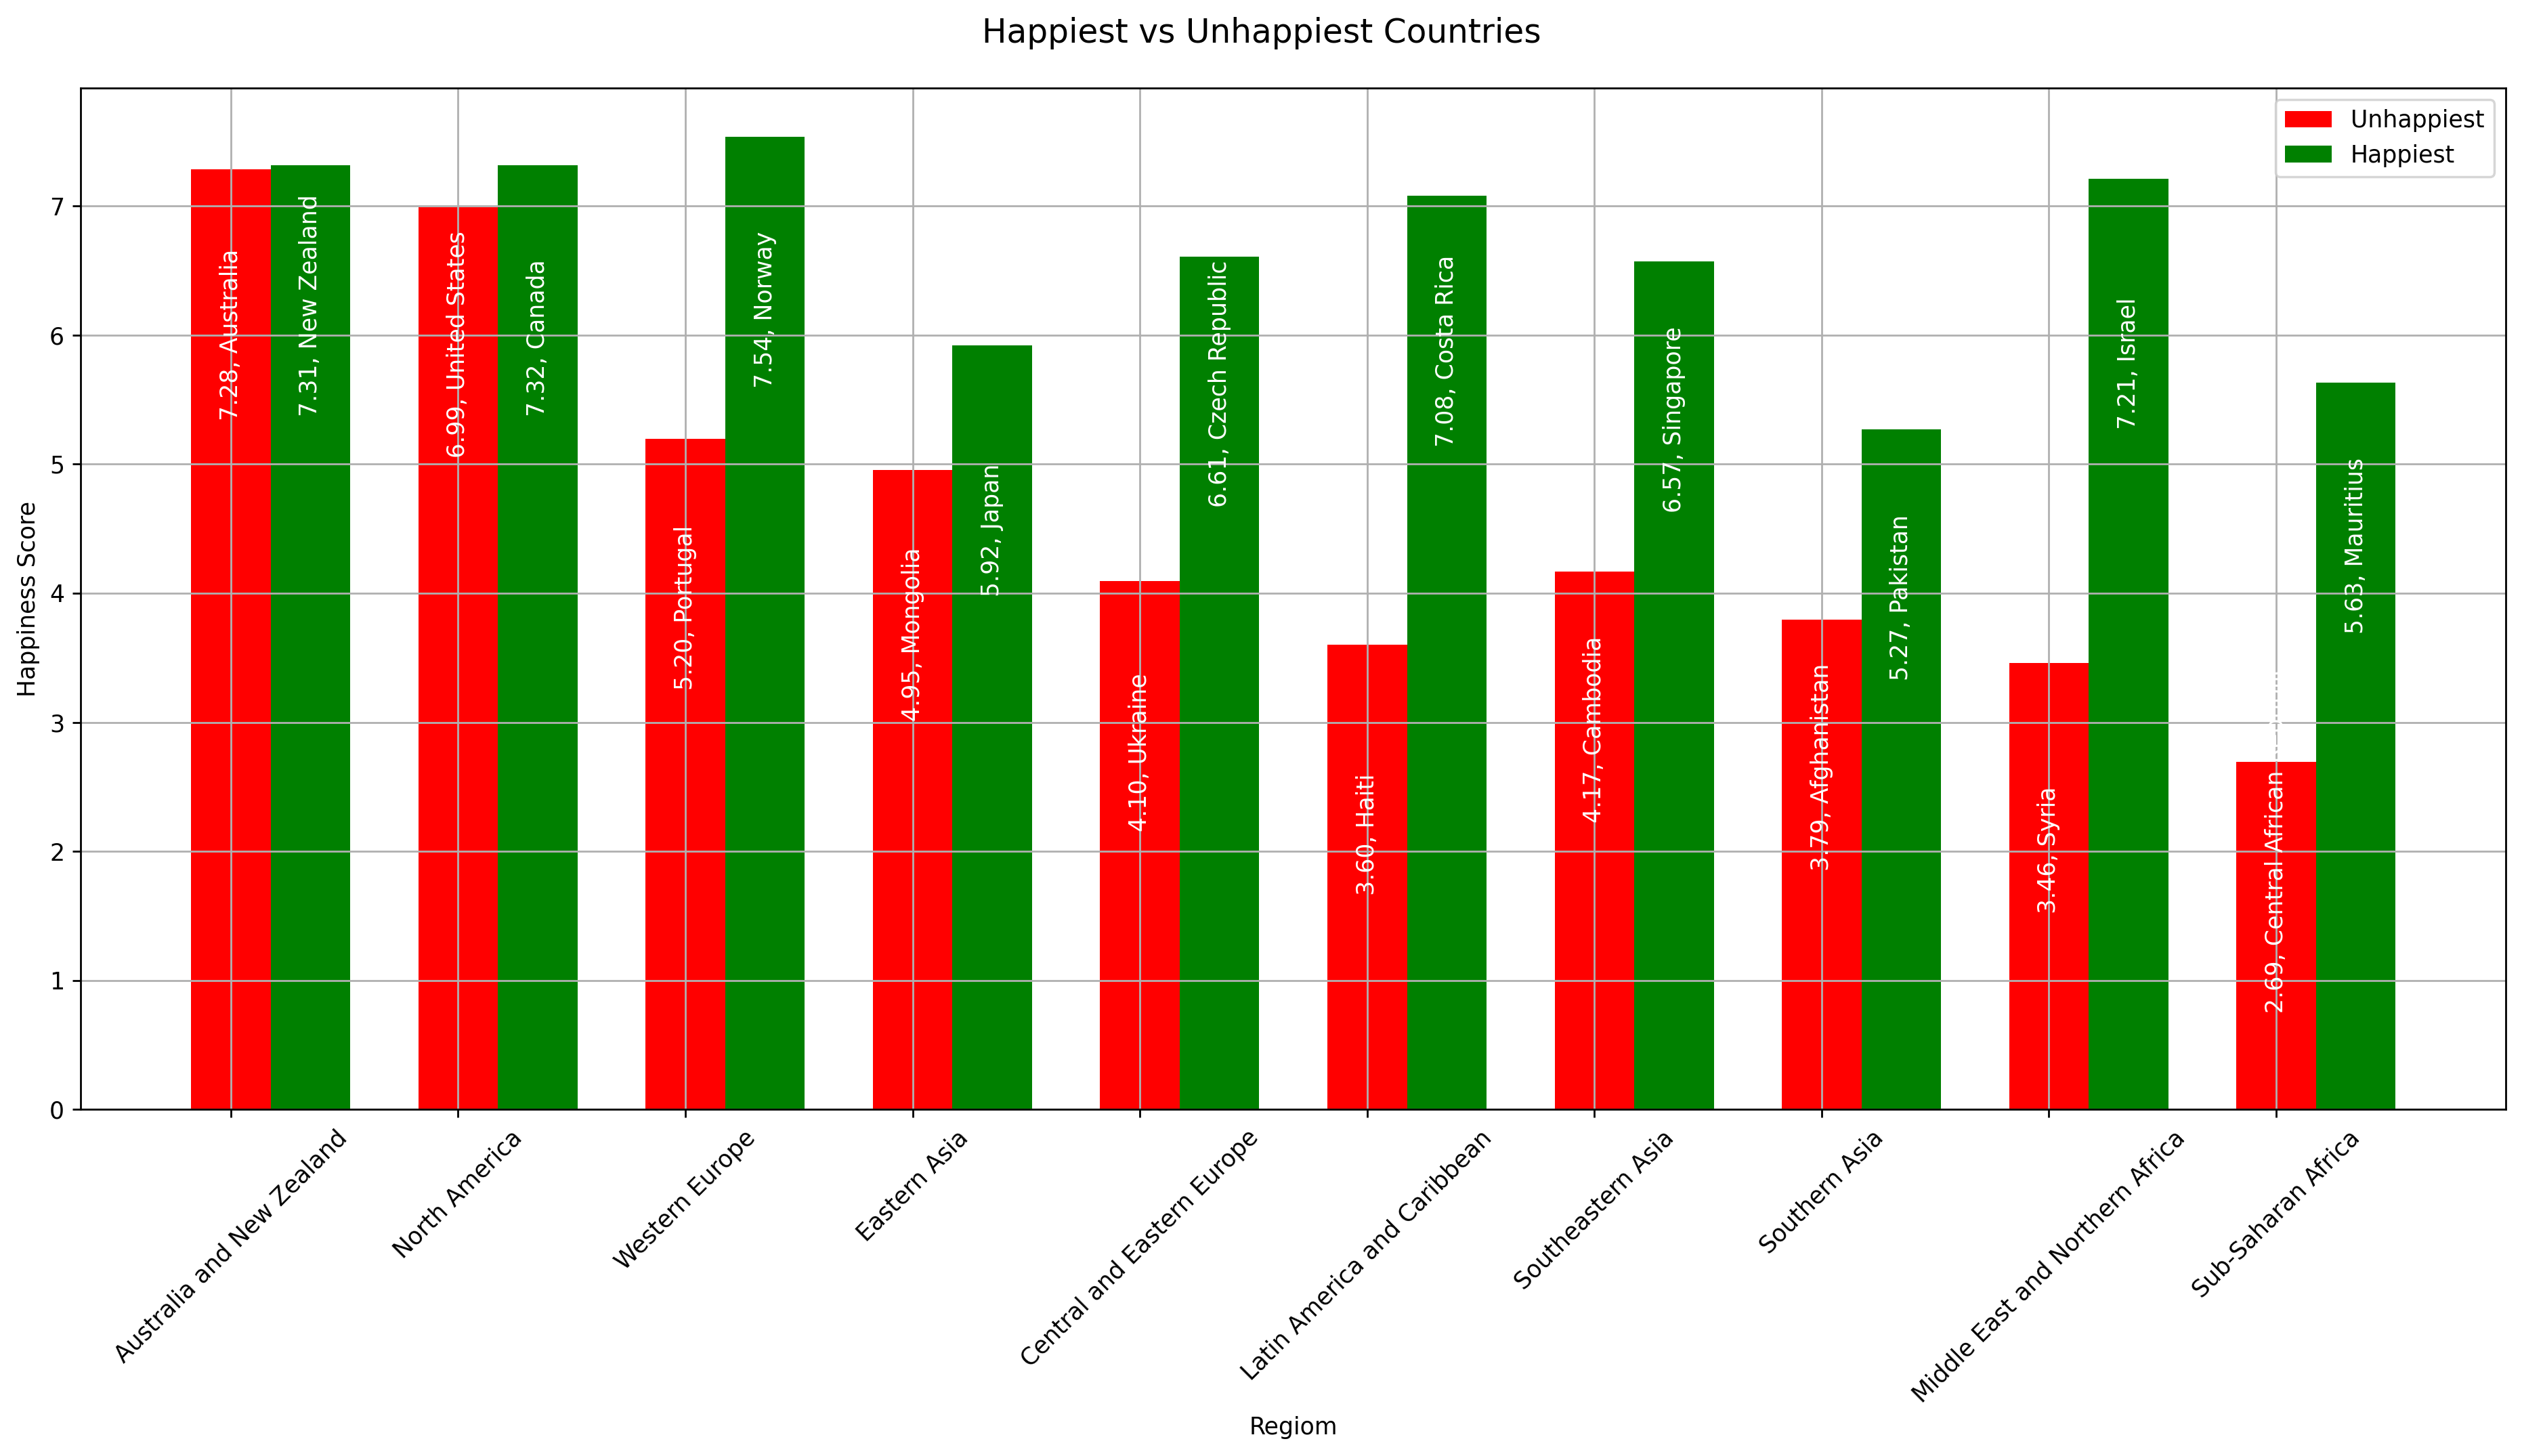

In [29]:
plt.figure(figsize=(15, 9), dpi= 250)

width = 0.35
ind = np.arange(happiest_unhappiest_2017.shape[0])

unhappy_plot = plt.bar(ind, happiest_unhappiest_2017['Happiness_Score_Unhappiest'], width = width, color = 'red')
happy_plot = plt.bar(ind + width, happiest_unhappiest_2017['Happiness_Score_Happiest'], width = width, color = 'green')

plt.xlabel('Regiom')
plt.ylabel('Happiness Score')
plt.grid()
plt.xticks(ind, happiest_unhappiest_2017['Region'])
plt.xticks(rotation=45) 
plt.legend(['Unhappiest','Happiest'], loc='upper right')
plt.suptitle('Happiest vs Unhappiest Countries',fontsize=14)

def autolabel(rects, countries):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, country in zip(rects, countries):
        height = rect.get_height()
        plt.annotate('{0:.2f}, {1}'.format(height, country),
                    xy=(rect.get_x() + rect.get_width() / 2, height - 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90,
                    color = 'white')
        
autolabel(unhappy_plot, happiest_unhappiest_2017['Unhappiest_Country'])
autolabel(happy_plot, happiest_unhappiest_2017['Happiest_Country'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Task 4: Countries that became unhappy between 2015 to 2017

In [0]:
from functools import reduce

to_merge = [world_happiness_2015[['Country','Happiness Score']]\
            .rename(columns = {'Happiness Score':'HScore_2015'}), 
            world_happiness_2016[['Country','Happiness Score']]\
            .rename(columns = {'Happiness Score':'HScore_2016'}), 
            world_happiness_2017[['Country','Happiness.Score']]\
            .rename(columns = {'Happiness.Score':'HScore_2017'})]
combined_happiness_score = reduce(lambda left, right: pd.merge(left, right, on='Country'), to_merge)

combined_happiness_score = combined_happiness_score.dropna()

In [0]:
is_decreasing = (combined_happiness_score.loc[:,combined_happiness_score.columns !='Country']\
                 .diff(axis = 1).fillna(0) <= 0).all(1)

In [0]:
combined_happiness_score['unhappy_btw_2015_2017'] = is_decreasing

In [33]:
combined_happiness_score[combined_happiness_score['unhappy_btw_2015_2017'] == True].head(5)

,Country,HScore_2015,HScore_2016,HScore_2017,unhappy_btw_2015_2017
0,Switzerland,7.587,7.509,7.494,True
2,Denmark,7.527,7.526,7.522,True
4,Canada,7.427,7.404,7.316,True
7,Sweden,7.364,7.291,7.284,True
10,Israel,7.278,7.267,7.213,True


## Task 5: Find the country whose happiness decreased by the most amount

In [0]:
happiness_drop = combined_happiness_score\
.apply(lambda x: x['HScore_2017'] - x['HScore_2015'], axis = 1).sort_values(ascending = True).head(1).index

In [35]:
combined_happiness_score.iloc[happiness_drop,]

,Country,HScore_2015,HScore_2016,HScore_2017,unhappy_btw_2015_2017
21,Venezuela,6.81,6.084,5.25,True


# UDF101

## Downloading Data

In [0]:
import os
from shutil import copy

In [37]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101.rar

--2020-05-10 10:53:38--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar.1’

UCF101.rar.1          8%[>                   ] 535.79M  15.5MB/s    eta 9m 51s ^C


In [38]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip

--2020-05-10 10:54:34--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip.1’

UCF101TrainTestSpli 100%[===================>] 111.27K   295KB/s    in 0.4s    

2020-05-10 10:54:36 (295 KB/s) - ‘UCF101TrainTestSplits-RecognitionTask.zip.1’ saved [113943/113943]



In [0]:
!unrar x UCF101.rar .

In [41]:
!unzip UCF101TrainTestSplits-RecognitionTask.zip

Archive:  UCF101TrainTestSplits-RecognitionTask.zip
replace ucfTrainTestlist/classInd.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ucfTrainTestlist/classInd.txt  
  inflating: ucfTrainTestlist/testlist01.txt  
  inflating: ucfTrainTestlist/testlist02.txt  
  inflating: ucfTrainTestlist/testlist03.txt  
  inflating: ucfTrainTestlist/trainlist01.txt  
  inflating: ucfTrainTestlist/trainlist02.txt  
  inflating: ucfTrainTestlist/trainlist03.txt  


## Moving files and creating folders

In [0]:
# extracting test and train lists

base = 'ucfTrainTestlist'

for root, dirs, files in os.walk(base):
  files = [os.path.join(base, f) 
  for f in files if (not f[0] == '.' and not 'classInd.txt' in f)]

In [0]:
def ensure_dir(dir_path):
  """
  Ensure directory exists
  """
  directory = os.path.dirname(dir_path)
  if not os.path.exists(directory):
    print('Directory Exception: ' + dir_path +
          ' not available, creating now...')
    os.makedirs(directory)

In [44]:
ensure_dir('/content/UCF-101_data')

for file in files:
  list_files = pd.read_csv(file, header = None)
  for index, row in list_files.iterrows():
    label, file_name = row[0].split(os.sep)
    path_dest = os.path.join('/content/UCF-101_data',
                        file.split(os.sep)[1].split('.')[0], 
                        label,"")
    path_source = os.path.join('/content/UCF-101', row[0])
    ensure_dir(path_dest)
    try:
      copy(path_source, path_dest)
    except FileNotFoundError:
      print('Not found: {}'.format(path_source))

Streaming output truncated to the last 5000 lines.
Not found: /content/UCF-101/Knitting/v_Knitting_g22_c02.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g22_c03.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g22_c04.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g23_c01.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g23_c02.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g23_c03.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g23_c04.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g24_c01.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g24_c02.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g24_c03.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g24_c04.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g25_c01.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g25_c02.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g25_c03.avi 50
Not found: /content/UCF-101/Knitting/v_Knitting_g25_c04.avi 50
Not 